# Rocket Equation

The ideal rocket equation was developed by the Russian scientist Konstantin Tsiolkovsky, a pioneer of astronautic theory. This equation relates the change of velocity that an accelerating rocket experiences as it expels burnt propellant 

\begin{equation}
\Delta V = V_{exh} \ln(\frac{M_{0}}{M_{0} - M_{fuel}})
\end{equation}


### Parameters
Let us begin by defining some parameters of the rocket:

(1) It's initial mass $M_{0}$. Set it to 1, it can mean 1 ton, 1 millions tons, whatever... We will relate the fuel mass to that.

(2) The exhaust velocity $V_{exh}$. This represents the velocity of the burnt propellant coming out of the rocket noozle. We will use a typical value from the Space Shuttle solid rocket booster

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M0 = 1.           # Initial Mass of the rocket
v_exh = 2500      # Exhaust velocity Space Shuttle Booster [m / s]

### Impact of fuel $M_{fuel}$

We will now learn how the amount of fuel we carry in our rocket influences the speed it can achieve. Let us assume the mass of fuel we carry is just a fraction $\epsilon$ (between 0 and 1) of our initial mass $M_{0}$, so that $M_{fuel}=\epsilon M_{0}$. 

We start by creating an array of different fuel masses, ranging from 0% of $M_{0}$ to a maximum of 95% of $M_{0}$

In [6]:
max_eps = 0.95      # Maximum fuel we can carry is 95% of M0
epsilon = np.linspace(0, max_eps, 100)
fuel_masses = epsilon * M0
print('First 10 fuel mass values:')
print(fuel_masses[:10])

First 10 fuel mass values:
[ 0.          0.00959596  0.01919192  0.02878788  0.03838384  0.0479798
  0.05757576  0.06717172  0.07676768  0.08636364]


For each value of fuel mass we will compute the final velocity we can achieve, according to the rocket equation

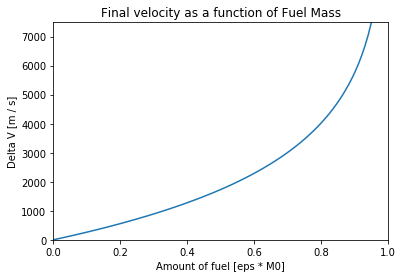

In [12]:
v_final = v_exh * np.log(M0 / (M0 - fuel_masses))

plt.figure()
plt.plot(fuel_masses, v_final)
plt.xlim([0, 1])
plt.ylim([0, v_final.max()])
plt.xlabel('Amount of fuel [eps * M0]')
plt.ylabel('Delta V [m / s]')
plt.title('Final velocity as a function of Fuel Mass')
plt.show()

Looking at the figure above, we can conclude that as we carry more and more fuel, we are able to accelerate our rocket to greater speeds. Nevertheless, we should bear in mind that the amount of fuel we can carry is limited by structural considerations (our rocket cannot be 100% fuel) and mission requirements (we want to be able to send something, a payload, inside our rocket).

### Impact of exhaust velocity $V_{exh}$

The rocket equation tells us that larger exhaust velocities $V_{exh}$ contribute to achieving larger velocity gains. The exhaust velocity $V_{exh}$ is very much a function of the rocket propulsion system we use (solid rocket, liquid rocket, electric) and, in a sense, it is a measure of the $efficiency$ of the rocket as it transforms energy (chemical, electric) into kinetic energy of the propellant.

To illustrate how this impacts the final speed, we can use different values of $V_{exh}$ for different types of rockets

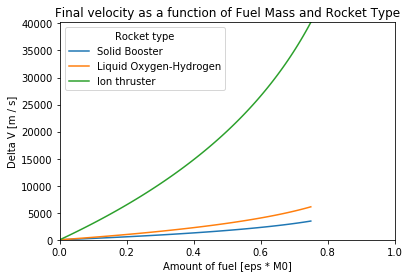

In [14]:
max_eps = 0.75      # Maximum fuel we can carry is 75% of M0
epsilon = np.linspace(0, max_eps, 100)
fuel_masses = epsilon * M0


rocket_types = ['Solid Booster', 'Liquid Oxygen-Hydrogen', 'Ion thruster']
velocities_exhaust = [2500, 4400, 29000]

plt.figure()

for (v_exh, rocket_type) in zip(velocities_exhaust, rocket_types):
    v_final = v_exh * np.log(M0 / (M0 - fuel_masses))
    plt.plot(fuel_masses, v_final, label=rocket_type)
    
plt.xlim([0, 1])
plt.ylim([0, v_final.max()])
plt.xlabel('Amount of fuel [eps * M0]')
plt.ylabel('Delta V [m / s]')
plt.title('Final velocity as a function of Fuel Mass and Rocket Type')
plt.legend(title='Rocket type')
plt.show()
    

### Conclusions

As we can see, a rocket based on electric propulsion (Ion Thruster) is way more efficient at converting fuel into velocity gains than any conventional rocket based on Solid Propellant or Liquid Propellant.

So, why are we not using electric propulsion for our rockets?! 

Well the catch here is that Rocket Equation doesn't tell you anything about the actual Thrust of the rocket (i.e. the total Force that it produces), it only deals with speed increments over an 'undefined' timespan. 

At the launch pad, you need at rocket capable of producing a Force at least greater than the weight of the rocket $W=gM_{0}$, where $M_{0}$ is usually many tons. Solid and liquid rockets can produce that level of thrust, however, Ion Thruster cannot (they can only produce very small forces).

But Ion Thrusters are not useless; they are extremely efficient at converting fuel into velocity. In situations like the interplanetary transfer of a very small and lightweight satellite, Ion Thrusters can provide a low thrust for a prolonged period of time (weeks, months) and this can lead to substantial accelerations